## Phylogenetic Tree Construction Example

In [3]:
%load_ext autoreload

In [12]:
%autoreload 2
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance

In [12]:
# I will use short pre-aligned sequences for this demonstration.
seqs = """
----------LYLAPGAQAAG
GAVTMNMFCAGSEGGAVDSCQ
LRCSGHLLTPTSLWPSIVPCA
----IFAVCYAIKYSA-----
HDTGVLHVCAGFRRALLAACD
TRIHPENICAGKIEGGISPCK
GKIKDFSLCAHYTSENSDSCL
GSVRTDHICALADEAKMDRCE
GAIHPHNVCAGYP--------
WIIEKTHLCAGFPQGGTGTCQ
"""

# Split into a list and remove blank lines.
seqs = list(filter(None, seqs.splitlines()))

names = 'XP_007974475,XP_015687330,XP_007974474,XP_022060919,EGW14543,XP_016853777,XP_004912463,XP_020633913,XP_009953276,XP_025902882'.split(',');

# Number of sequences
N = len(seqs)

### Calculate a distance matrix between entries

In [42]:
import rich
import pandas as pd

In [66]:
# Number of sequences
N = df.shape[0]

# Initialize distance matrix
dist = np.zeros((N,N))

for i in range(N):
    for j in range(i+1, N):
        dist[i,j] = sum([ 1  for k in range(len(df.seq[i])) if df.seq[i][k]!=df.seq[j][k] ])/float(len(df.seq[i])) * 100
        dist[j,i] = dist[i,j]

rich.print(dist)

[[  0.         100.          90.47619048  80.95238095  95.23809524
   95.23809524  95.23809524  95.23809524  95.23809524  95.23809524]
 [100.           0.          90.47619048  90.47619048  80.95238095
   76.19047619  71.42857143  71.42857143  76.19047619  71.42857143]
 [ 90.47619048  90.47619048   0.         100.          95.23809524
   80.95238095  90.47619048  95.23809524  95.23809524  90.47619048]
 [ 80.95238095  90.47619048 100.           0.          90.47619048
   95.23809524  90.47619048  95.23809524  66.66666667  95.23809524]
 [ 95.23809524  80.95238095  95.23809524  90.47619048   0.
   80.95238095  85.71428571  76.19047619  80.95238095  71.42857143]
 [ 95.23809524  76.19047619  80.95238095  95.23809524  80.95238095
    0.          80.95238095  76.19047619  66.66666667  66.66666667]
 [ 95.23809524  71.42857143  90.47619048  90.47619048  85.71428571
   80.95238095   0.          76.19047619  76.19047619  76.19047619]
 [ 95.23809524  71.42857143  95.23809524  95.23809524  76.19047619
   76.19047619  76.19047619   0.          85.71428571  80.95238095]
 [ 95.23809524  76.19047619  95.23809524  66.66666667  80.95238095
   66.66666667  76.19047619  85.71428571   0.          76.19047619]
 [ 95.23809524  71.42857143  90.47619048  95.23809524  71.42857143
   66.66666667  76.19047619  80.95238095  76.19047619   0.        ]]

In [62]:
# Python has external libraries for calculation of sequence distances with common correction methods. 
# I will calculate the distance myself here.

# You can optimize this code, realizing the matrix is a symmetric matrix
# (so you only have to calculate one half of the matrix). And that
# diagonals are zeros (so you don't have to calculate the diagonals.

dists = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        # You need to define distances between entries. I will use the 
        # "p-distance", i.e., percentage of mismatched characters as the distance measure. 
        # One can apply a distance correction strategy to get a more accurate evolutionary 
        # time metric, but I will not do that here.
        # If the sequences weren't pre-aligned, you would need to align them first before 
        # calculating their distance.
        dists[i,j] = sum([ 1  for k in range(0,len(seqs[i])) if seqs[i][k]!=seqs[j][k] ])/float(len(seqs[i])) * 100

rich.print(dists)

[[  0.         100.          90.47619048  80.95238095  95.23809524
   95.23809524  95.23809524  95.23809524  95.23809524  95.23809524]
 [100.           0.          90.47619048  90.47619048  80.95238095
   76.19047619  71.42857143  71.42857143  76.19047619  71.42857143]
 [ 90.47619048  90.47619048   0.         100.          95.23809524
   80.95238095  90.47619048  95.23809524  95.23809524  90.47619048]
 [ 80.95238095  90.47619048 100.           0.          90.47619048
   95.23809524  90.47619048  95.23809524  66.66666667  95.23809524]
 [ 95.23809524  80.95238095  95.23809524  90.47619048   0.
   80.95238095  85.71428571  76.19047619  80.95238095  71.42857143]
 [ 95.23809524  76.19047619  80.95238095  95.23809524  80.95238095
    0.          80.95238095  76.19047619  66.66666667  66.66666667]
 [ 95.23809524  71.42857143  90.47619048  90.47619048  85.71428571
   80.95238095   0.          76.19047619  76.19047619  76.19047619]
 [ 95.23809524  71.42857143  95.23809524  95.23809524  76.19047619
   76.19047619  76.19047619   0.          85.71428571  80.95238095]
 [ 95.23809524  76.19047619  95.23809524  66.66666667  80.95238095
   66.66666667  76.19047619  85.71428571   0.          76.19047619]
 [ 95.23809524  71.42857143  90.47619048  95.23809524  71.42857143
   66.66666667  76.19047619  80.95238095  76.19047619   0.        ]]

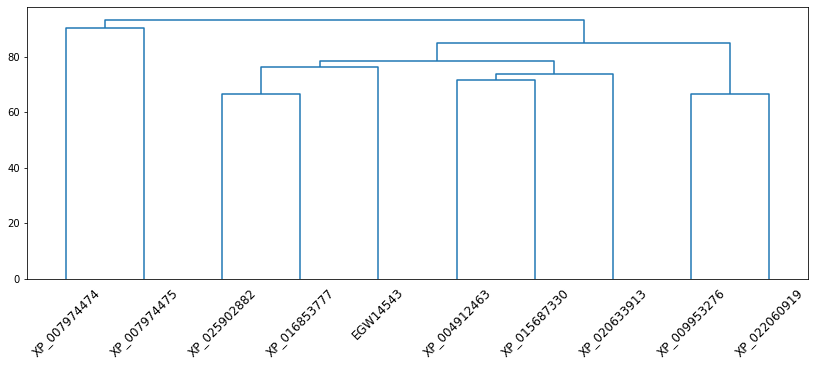

In [24]:
# Construct and draw the phylogenetic tree
phy = hierarchy.linkage(distance.squareform(dists), "average")

plt.figure(figsize=(14,5))
hierarchy.dendrogram(phy, orientation='top', labels=names, distance_sort='descending',
                     show_leaf_counts=True)
plt.xticks(rotation=45)
plt.show()

# The x axis shows "the distance at which entries merge" rather than "distance from ancestor". 
# You can divide the x tick labels shown here by 2 to obtain the distance from ancestor 
# (ie. the branch lengths).

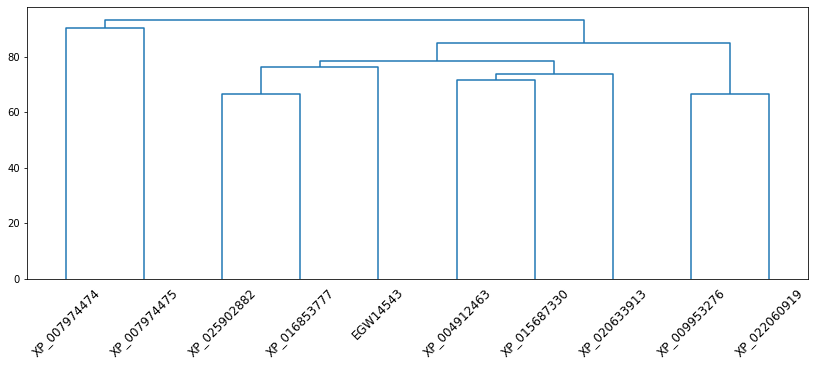

In [68]:
# Construct and draw the phylogenetic tree
phy = hierarchy.linkage(distance.squareform(dist), "average")

plt.figure(figsize=(14,5))
hierarchy.dendrogram(phy, orientation='top', labels=names, distance_sort='descending',
                     show_leaf_counts=True)
plt.xticks(rotation=45)
plt.show()

In [17]:
import plotly.figure_factory as ff


fig = ff.create_dendrogram(dist, labels=names,
distfun=lambda x: distance.squareform(np.where(x, x, x.T)),
linkagefun=lambda x: hierarchy.linkage(x, 'complete'))
fig.show()

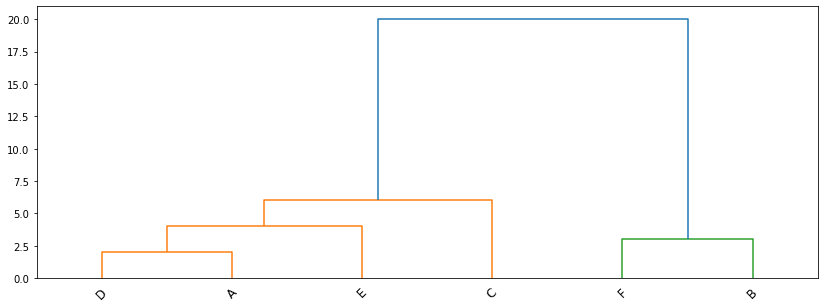

In [10]:
names = ['A', 'B', 'C', 'D', 'E', 'F']
dist = np.array([[0, 4,  3, 2, 4, 11], [0, 0, 20, 8, 6,  3], [0, 0,  0, 6, 5, 18],
                [0, 0,  0, 0, 3, 13], [0, 0,  0, 0, 0,  8], [0, 0,  0, 0, 0,  0]])
phy = hierarchy.linkage(distance.squareform(np.where(dist, dist, dist.T)), 'complete')

mpl_fig = plt.figure(figsize=(14,5))
hierarchy.dendrogram(phy, orientation='top', labels=names, distance_sort='descending',
                     show_leaf_counts=True)
plt.xticks(rotation=45)
plt.show()

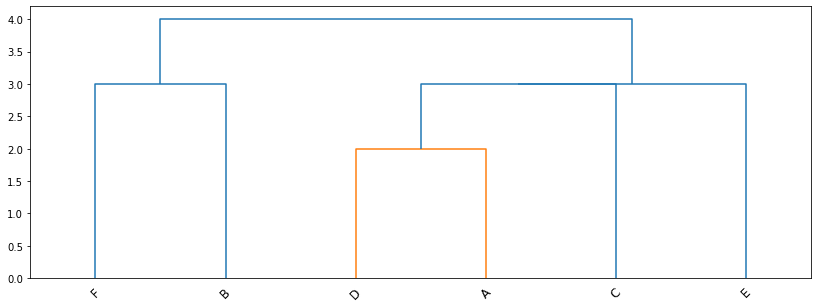

In [34]:
names = ['A', 'B', 'C', 'D', 'E', 'F']
dist = np.array([[0, 4,  3, 2, 4, 11], [0, 0, 20, 8, 6,  3], [0, 0,  0, 6, 5, 18],
                [0, 0,  0, 0, 3, 13], [0, 0,  0, 0, 0,  8], [0, 0,  0, 0, 0,  0]])
phy = hierarchy.linkage(distance.squareform(np.where(dist, dist, dist.T)), 'single')

mpl_fig = plt.figure(figsize=(14,5))
hierarchy.dendrogram(phy, orientation='top', labels=names, distance_sort='descending',
                     show_leaf_counts=True)
plt.xticks(rotation=45)
plt.show()

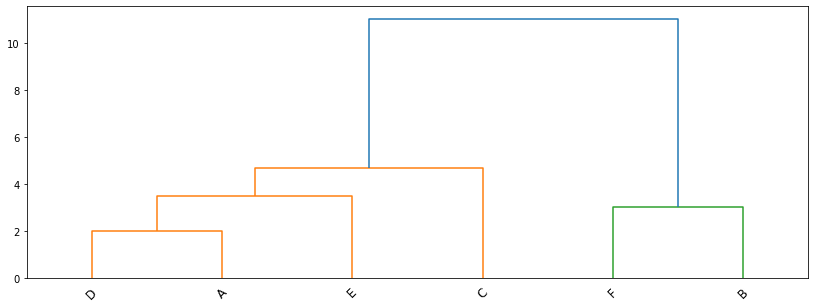

In [31]:
names = ['A', 'B', 'C', 'D', 'E', 'F']
dist = np.array([[0, 4,  3, 2, 4, 11], [0, 0, 20, 8, 6,  3], [0, 0,  0, 6, 5, 18],
                [0, 0,  0, 0, 3, 13], [0, 0,  0, 0, 0,  8], [0, 0,  0, 0, 0,  0]])
phy = hierarchy.linkage(distance.squareform(np.where(dist, dist, dist.T)), 'average')

mpl_fig = plt.figure(figsize=(14,5))
hierarchy.dendrogram(phy, orientation='top', labels=names, distance_sort='descending',
                     show_leaf_counts=True)
plt.xticks(rotation=45)
plt.show()

In [33]:
fig = ff.create_dendrogram(dist, labels=names,
distfun=lambda x: distance.squareform(np.where(x, x, x.T)),
linkagefun=lambda x: hierarchy.linkage(x, 'average'))
fig.show()

In [27]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

In [28]:
phy = hierarchy.linkage(distance.squareform(np.where(dist, dist, dist.T)), 'single')
tree = hierarchy.to_tree(phy, False)
get_newick(tree, tree.dist, names)

'((F:3.00,B:3.00):1.00,(((D:2.00,A:2.00):1.00,C:3.00):0.00,E:3.00):1.00);'